In [1]:
from torchvision.datasets import MNIST
from torchvision import transforms


In [2]:
from torch.utils.data import DataLoader
def get_dataloader(train=True):
    mnist = MNIST(root='./dataset',train=train,download=False,transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,),(0.3081,))
    ]))
    data_loader = DataLoader(dataset=mnist,batch_size=64,shuffle=True)
    return data_loader

In [3]:
import torch.nn.functional as F
import torch.nn as nn
class MNISTNet(nn.Module):
    def __init__(self):
        super(MNISTNet,self).__init__()
        self.fc1 = nn.Linear(28*28*1,28)
        self.fc2 = nn.Linear(28,10)
        
    def forward(self,x):
        x = x.view(-1,28*28*1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        return F.log_softmax(x,dim=-1)

C:\Users\26250\AppData\Local\Temp\ipykernel_5240\93209688.py:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('./model/model.pkl'))
C:\Users

0.0639411062002182
0.008272002451121807
0.041362594813108444
0.04392318055033684
0.04117647930979729
0.005853584501892328
0.0643596276640892
0.054087962955236435
0.05056598782539368
0.09158584475517273
0.027956850826740265
0.12886884808540344
0.027655448764562607
0.009964324533939362
0.029070597141981125
0.04710666090250015
0.10494311898946762
0.05645308643579483
0.011068250983953476
0.036594245582818985
0.0078811040148139
0.025578193366527557
0.05177672952413559
0.0644894391298294
0.10302075743675232
0.034515611827373505
0.020208045840263367
0.02021956630051136
0.018350955098867416
0.03717343881726265
0.07095217704772949
0.03971901908516884
0.07328583300113678
0.021590586751699448
0.03577020764350891
0.034815870225429535
0.029056614264845848
0.09094726294279099
0.0627327710390091
0.01672518067061901
0.10515780001878738
0.08482153713703156
0.03241414204239845
0.02197600156068802
0.10061849653720856
0.03815791383385658
0.04371992498636246
0.07390548288822174
0.058387499302625656
0.10420

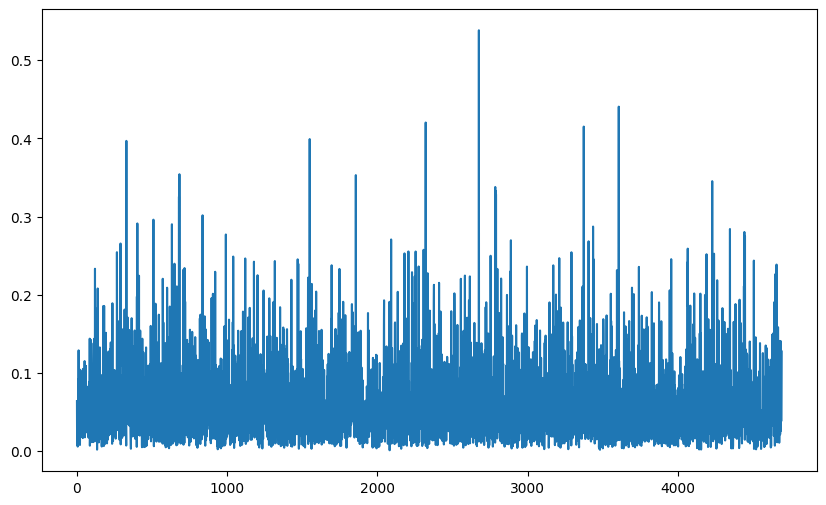

In [4]:
import torch
import os
model = MNISTNet()
optimiser = torch.optim.Adam(model.parameters(),lr = 0.0005)

if os.path.exists('./model/model.pkl'):
    model.load_state_dict(torch.load('./model/model.pkl'))
    optimiser.load_state_dict(torch.load('./model/optimiser.pkl'))
    
hist = []
def train(epoch):
    dataloader = get_dataloader()
    for idx,(input,target) in enumerate(dataloader):
        optimiser.zero_grad()
        pred = model(input)
        loss = F.nll_loss(pred,target=target)
        loss.backward()
        optimiser.step()
        hist.append(loss.detach())
        print(loss.item())
        
for i in range(5):
    train(i)

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,6))
plt.plot(hist)

In [5]:
torch.save(optimiser.state_dict(),'./model/optimiser.pkl')
torch.save(model.state_dict(),'./model/model.pkl')

torch.Size([64])
torch.Size([64, 10])
torch.Size([64])
torch.Size([64, 10])
torch.Size([64])
torch.Size([64, 10])
torch.Size([64])
torch.Size([64, 10])
torch.Size([64])
torch.Size([64, 10])
torch.Size([64])
torch.Size([64, 10])
torch.Size([64])
torch.Size([64, 10])
torch.Size([64])
torch.Size([64, 10])
torch.Size([64])
torch.Size([64, 10])
torch.Size([64])
torch.Size([64, 10])
torch.Size([64])
torch.Size([64, 10])
torch.Size([64])
torch.Size([64, 10])
torch.Size([64])
torch.Size([64, 10])
torch.Size([64])
torch.Size([64, 10])
torch.Size([64])
torch.Size([64, 10])
torch.Size([64])
torch.Size([64, 10])
torch.Size([64])
torch.Size([64, 10])
torch.Size([64])
torch.Size([64, 10])
torch.Size([64])
torch.Size([64, 10])
torch.Size([64])
torch.Size([64, 10])
torch.Size([64])
torch.Size([64, 10])
torch.Size([64])
torch.Size([64, 10])
torch.Size([64])
torch.Size([64, 10])
torch.Size([64])
torch.Size([64, 10])
torch.Size([64])
torch.Size([64, 10])
torch.Size([64])
torch.Size([64, 10])
torch.Size([

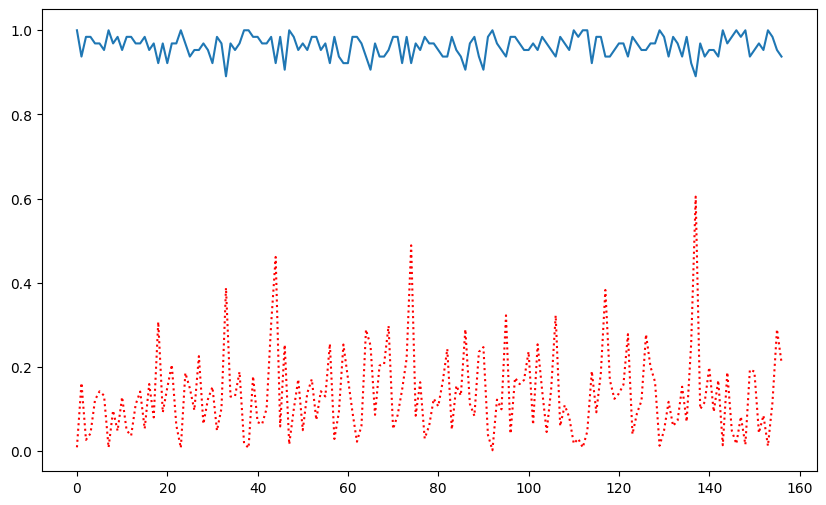

In [6]:
import numpy as np
def test():
    loss_list = []
    acc_list = []
    test_dataloader = get_dataloader(train=False)
    for idx,(input,target) in enumerate(test_dataloader):
        with torch.no_grad():
            pred = model(input)
            print(target.size())
            print(pred.size())
            loss = F.nll_loss(pred,target=target)
            loss_list.append(loss)
            pred = pred.max(dim=-1)[-1]
            cur_acc = pred.eq(target).float().mean()
            acc_list.append(cur_acc)
    print(np.mean(acc_list),np.mean(loss_list))
    return acc_list,loss_list

acc,loss = test()
fig = plt.figure(figsize=(10,6))
plt.plot(acc)
plt.plot(loss,'r:')
    